Shakshi Singh Rajput

U21EC138


TensorFlow is an end-to-end platform for machine learning. It supports the following:

* Multidimensional-array based numeric computation (similar to <a href="https://numpy.org/" class="external">NumPy</a>.)
* GPU and distributed processing
* Automatic differentiation
* Model construction, training, and export
* And more

## Tensors

TensorFlow operates on multidimensional arrays or _tensors_ represented as `tf.Tensor` objects. Here is a two-dimensional tensor:

In [ ]:
import tensorflow as tf

x = tf.constant([[2.,4.,6.],
                 [3.,5.,7.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[2. 4. 6.]
 [3. 5. 7.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


The most important attributes of a `tf.Tensor` are its `shape` and `dtype`:

* `Tensor.shape`: tells you the size of the tensor along each of its axes.
* `Tensor.dtype`: tells you the type of all the elements in the tensor.

TensorFlow implements standard mathematical operations on tensors, as well as many operations specialized for machine learning.

For example:

In [ ]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 4.,  8., 12.],
       [ 6., 10., 14.]], dtype=float32)>

In [ ]:
3 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 6., 12., 18.],
       [ 9., 15., 21.]], dtype=float32)>

In [ ]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[56., 68.],
       [68., 83.]], dtype=float32)>

In [ ]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[2., 4., 6.],
       [3., 5., 7.],
       [2., 4., 6.],
       [3., 5., 7.],
       [2., 4., 6.],
       [3., 5., 7.]], dtype=float32)>

In [ ]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.01587624, 0.11731043, 0.86681336],
       [0.01587624, 0.11731043, 0.86681336]], dtype=float32)>

In [ ]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=27.0>

Note: Typically, anywhere a TensorFlow function expects a `Tensor` as input, the function will also accept anything that can be converted to a `Tensor` using `tf.convert_to_tensor`. See below for an example.

In [ ]:
tf.convert_to_tensor([1,3,5])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 3, 5], dtype=int32)>

In [ ]:
tf.reduce_sum([1,3,5])

<tf.Tensor: shape=(), dtype=int32, numpy=9>

## Variables

Normal `tf.Tensor` objects are immutable. To store model weights (or other mutable state) in TensorFlow use a `tf.Variable`.

In [ ]:
var = tf.Variable([1.1, 2.2, 3.3])
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1.1, 2.2, 3.3], dtype=float32)>

In [ ]:
var.assign([2,4,6])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

In [ ]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([3., 5., 7.], dtype=float32)>

Refer to the [Variables guide](variable.ipynb) for details.

## Automatic differentiation

<a href="https://en.wikipedia.org/wiki/Gradient_descent" class="external">_Gradient descent_</a> and related algorithms are a cornerstone of modern machine learning.

To enable this, TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's _error_ or _loss_ with respect to its weights.

In [ ]:
x = tf.Variable(2.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [ ]:
f(x)

tf.Tensor(3.0, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

At `x = 1.0`, `y = f(x) = (1**2 + 2*1 - 5) = -2`.

The derivative of `y` is `y' = f'(x) = (2*x + 2) = 4`. TensorFlow can calculate this automatically:

In [ ]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

tf.Tensor(3.0, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

This simplified example only takes the derivative with respect to a single scalar (`x`), but TensorFlow can compute the gradient with respect to any number of non-scalar tensors simultaneously.

Refer to the [Autodiff guide](autodiff.ipynb) for details.

## Modules, layers, and models

`tf.Module` is a class for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them. The `tf.Module` class is necessary to support two significant features:

1. You can save and restore the values of your variables using `tf.train.Checkpoint`. This is useful during training as it is quick to save and restore a model's state.
2. You can import and export the `tf.Variable` values _and_ the `tf.function` graphs using `tf.saved_model`. This allows you to run your model independently of the Python program that created it.

Here is a complete example exporting a simple `tf.Module` object:

In [ ]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [ ]:
mod = MyModule(2)
mod.multiply(tf.constant([2,3,4]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 6, 8], dtype=int32)>

Save the `Module`:

In [ ]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

In [ ]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1,3,5]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 3,  9, 15], dtype=int32)>

The `tf.keras.layers.Layer` and `tf.keras.Model` classes build on `tf.Module` providing additional functionality and convenience methods for building, training, and saving models. Some of these are demonstrated in the next section.

Refer to [Intro to modules](intro_to_modules.ipynb) for details.

## Training loops

Now put this all together to build a basic model and train it from scratch.

First, create some example data. This generates a cloud of points that loosely follows a quadratic curve:

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

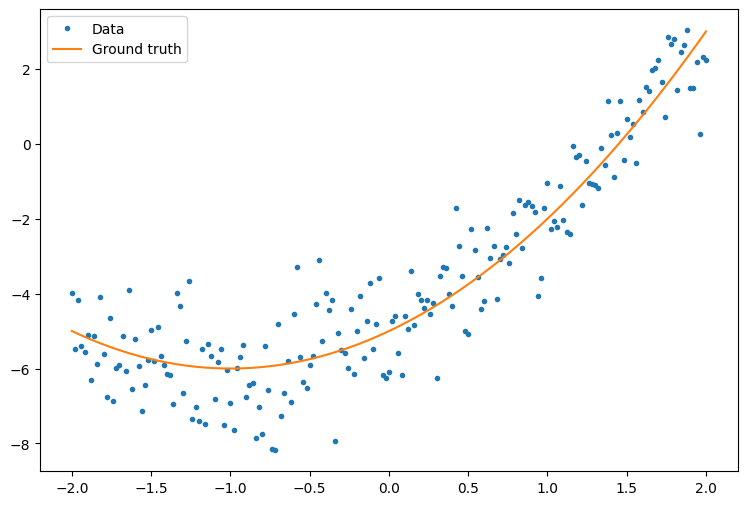

In [ ]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

Create a quadratic model with randomly initialized weights and a bias:

In [ ]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=8., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

First, observe your model's performance before training:

In [ ]:
quad_model = Model()

In [ ]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

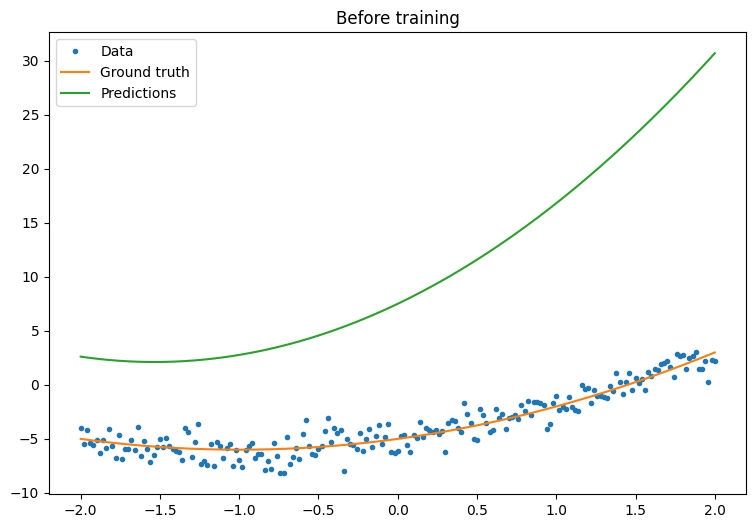

In [ ]:
plot_preds(x, y, f, quad_model, 'Before training')

Now, define a loss for your model:

Given that this model is intended to predict continuous values, the mean squared error (MSE) is a good choice for the loss function. Given a vector of predictions, $\hat{y}$, and a vector of true targets, $y$, the MSE is defined as the mean of the squared differences between the predicted values and the ground truth.

$MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_i -y_i)^2$

In [ ]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

Write a basic training loop for the model. The loop will make use of the MSE loss function and its gradients with respect to the input in order to iteratively update the model's parameters. Using mini-batches for training provides both memory efficiency and faster convergence. The `tf.data.Dataset` API has useful functions for batching and shuffling.

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 115.937
Mean squared error for step 10: 14.895
Mean squared error for step 20: 5.649
Mean squared error for step 30: 2.559
Mean squared error for step 40: 1.490
Mean squared error for step 50: 1.117
Mean squared error for step 60: 0.981
Mean squared error for step 70: 0.936
Mean squared error for step 80: 0.919
Mean squared error for step 90: 0.911




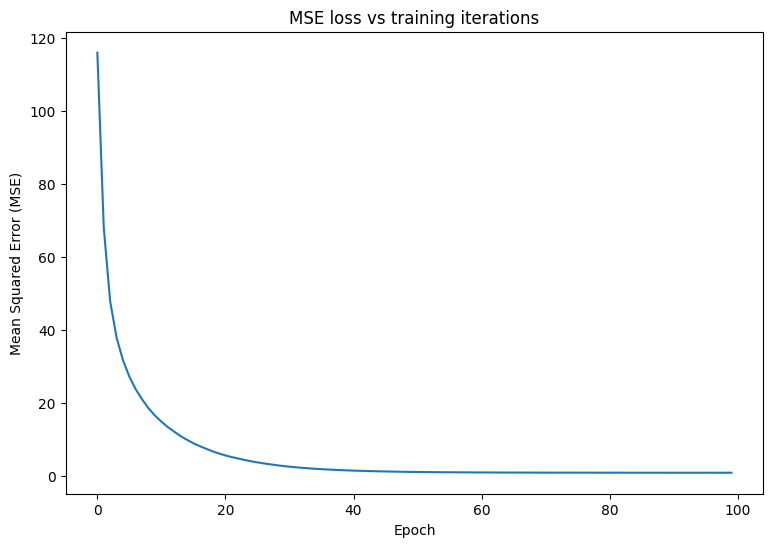

In [ ]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

Now, observe your model's performance after training:

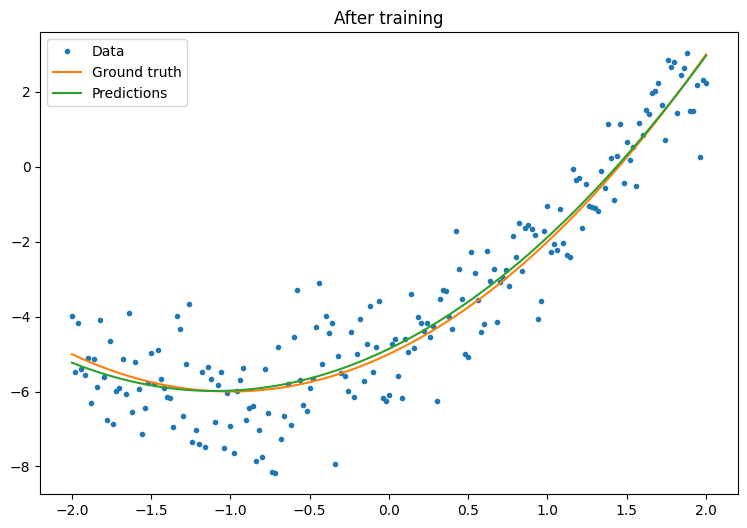

In [ ]:
plot_preds(x, y, f, quad_model, 'After training')

That's working, but remember that implementations of common training utilities are available in the `tf.keras` module. So, consider using those before writing your own. To start with, the `Model.compile` and `Model.fit` methods implement a training loop for you:

Begin by creating a Sequential Model in Keras using `tf.keras.Sequential`. One of the simplest Keras layers is the dense layer, which can be instantiated with `tf.keras.layers.Dense`. The dense layer is able to learn multidimensional linear relationships of the form $\mathrm{Y} = \mathrm{W}\mathrm{X} +  \vec{b}$. In order to learn a nonlinear equation of the form, $w_1x^2 + w_2x + b$, the dense layer's input should be a data matrix with $x^2$ and $x$ as features. The lambda layer, `tf.keras.layers.Lambda`, can be used to perform this stacking transformation.

In [ ]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [ ]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('/my_new_model.keras')


Observe your Keras model's performance after training:

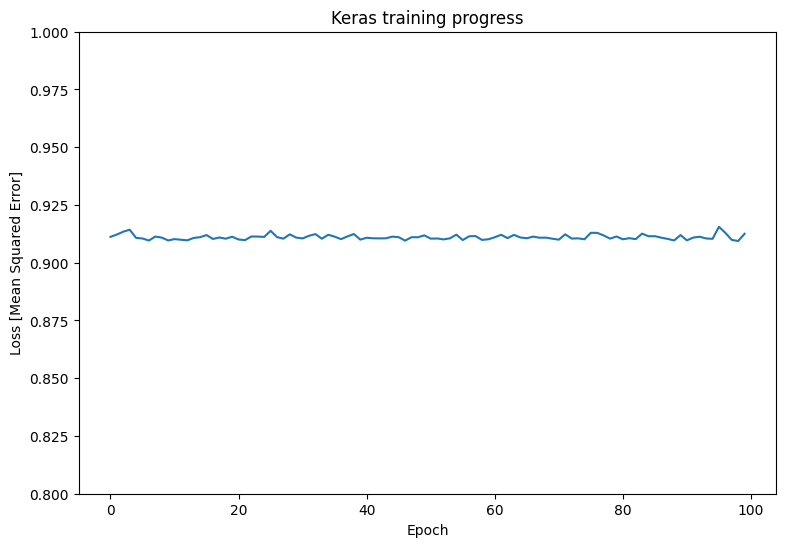

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim(0.8, 1)
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

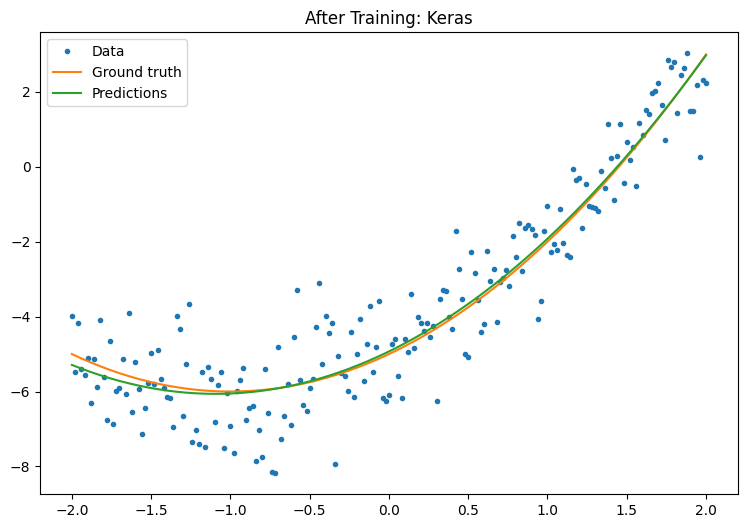

In [ ]:
plot_preds(x, y, f, new_model, 'After Training: Keras')

Refer to [Basic training loops](basic_training_loops.ipynb) and the [Keras guide](https://www.tensorflow.org/guide/keras) for more details.

**Conclusion:** 

By studying TensorFlow and successfully implementing a training loop, we gained a foundational understanding of how machine learning models are built, trained, and optimized using this powerful framework. Mastering this workflow will allow us to scale our knowledge to more complex tasks, such as custom model designs and advanced deep learning techniques. This knowledge will serve as a stepping stone for leveraging TensorFlow in various domains like image recognition, natural language processing, and beyond.